In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np 
import itertools

plt.style.use('fivethirtyeight')

from subprocess import check_output

In [2]:
diabetes = pd.read_csv('../data/diabetes.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Number of missing values from each feature ## 

In [4]:
features=['Pregnancies','Glucose','BloodPressure',
          'SkinThickness','Insulin','BMI',
          'DiabetesPedigreeFunction','Age','Outcome']

for var in features:
    if var == "Outcome": break
    print var + ": \t\t\t\t" +str(768 - len(diabetes[var].nonzero()[0]))

Pregnancies: 				111
Glucose: 				5
BloodPressure: 				35
SkinThickness: 				227
Insulin: 				374
BMI: 				11
DiabetesPedigreeFunction: 				0
Age: 				0


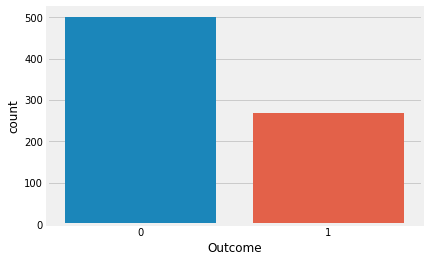

In [5]:
sb.countplot(x='Outcome', data=diabetes)
plt.show()

### Notice class imbalance ### 

We are now going to perform analysis on the count of each occurence with bins of 20 per feature

<function matplotlib.pyplot.show>

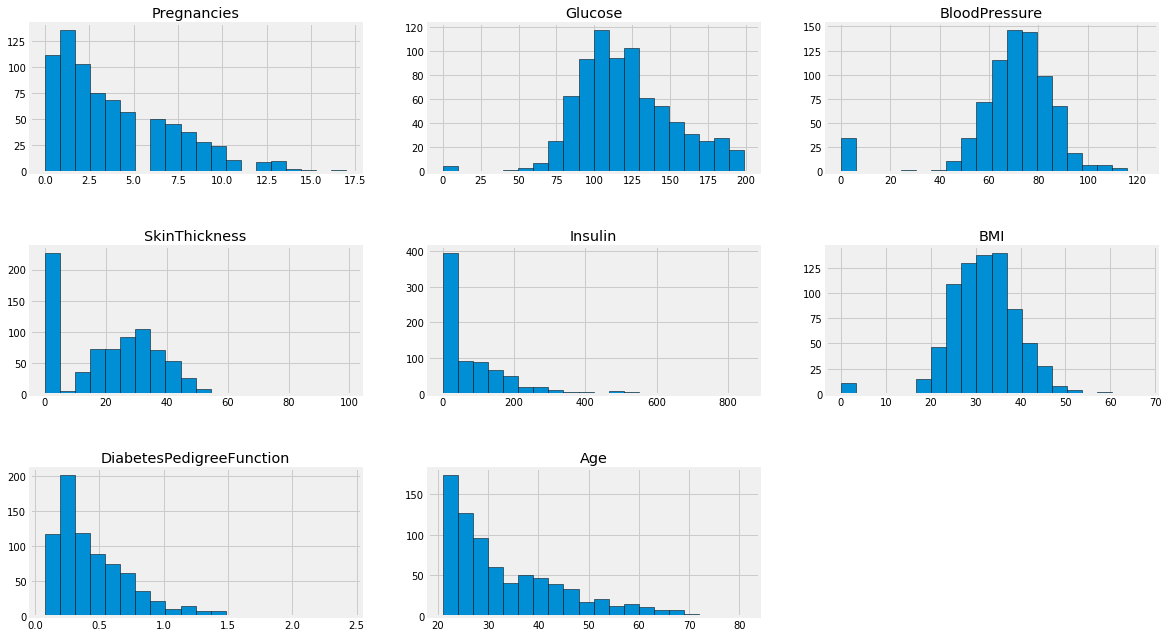

In [6]:
cols = diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length = len(cols)

for i,j in itertools.izip_longest(cols, range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    diabetes[i].hist(bins=20, edgecolor='black')
    plt.title(i)

plt.show

We will now do the same, but only looking at the diabetic cases

<function matplotlib.pyplot.show>

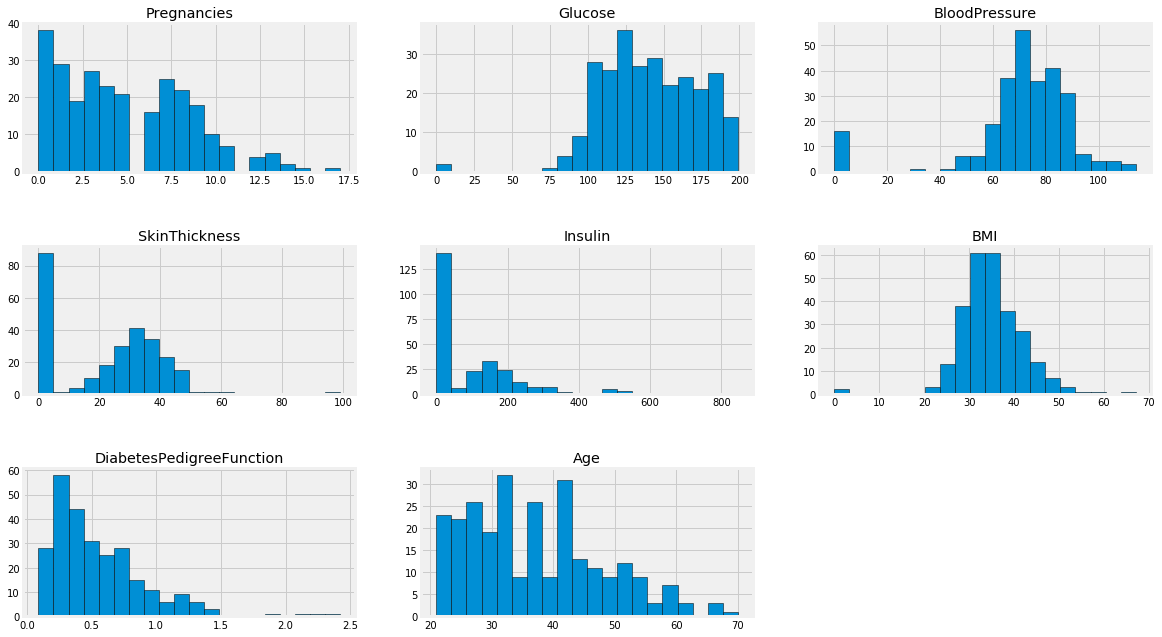

In [7]:
pos_diabetes = diabetes[diabetes['Outcome']==1]
cols_diabetes = diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length = len(cols_diabetes)

for i,j in itertools.izip_longest(cols_diabetes, range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    pos_diabetes[i].hist(bins=20, edgecolor='black')
    plt.title(i)

plt.show

### Pair plots ### 

For us to gain insight on distribution of the features in our dataset 

/Users/calvin-is-seksy/anaconda/envs/main/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/calvin-is-seksy/anaconda/envs/main/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/calvin-is-seksy/anaconda/envs/main/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/calvin-is-seksy/anaconda/envs/main/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


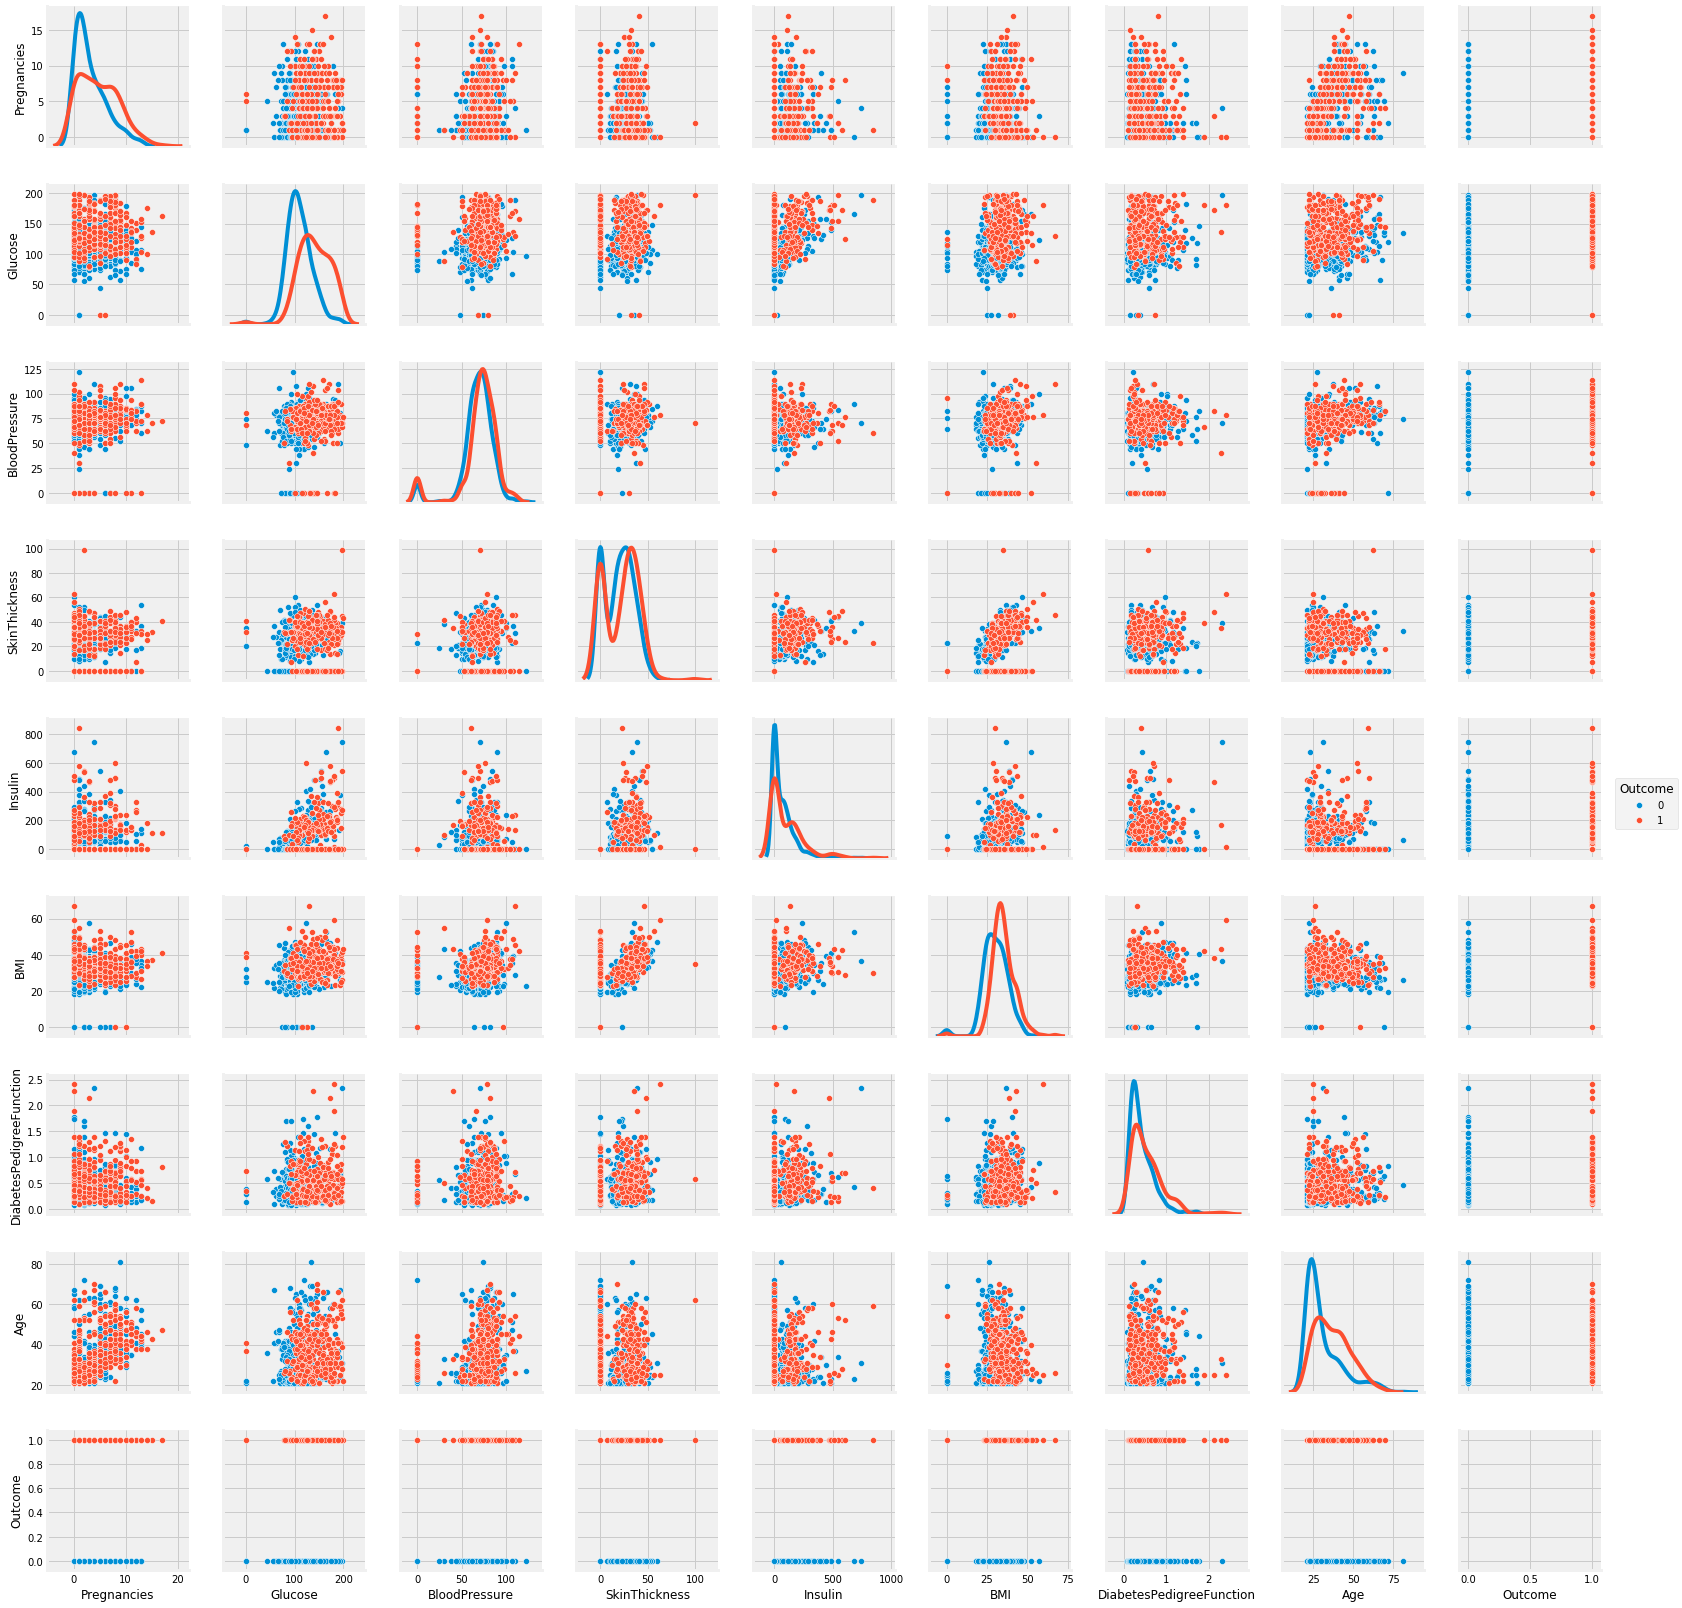

In [8]:
sb.pairplot(data=diabetes, hue='Outcome', diag_kind='kde')
plt.show() 

### Notes: ### 

- diagnoal shows distribution of the dataset with the kernel density plots

- scatter-plots show the relation between each feature
- no clear separation in any of the scatterplots, so we'll have to look into further sophisticated ML models 

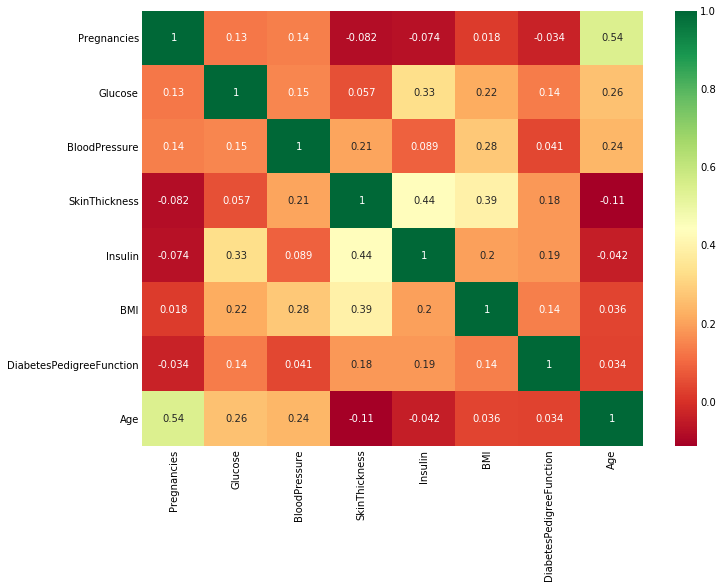

In [15]:
sb.heatmap(diabetes[diabetes.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Conclude that there doesn't seem to be any features that are highly correlated -- so the number of features we
# have rn is the intrinsic dimension of our dataset, so we will begin training. 

## Predictive Modeling ## 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Train/Test Split ### 
75/25 split 

In [10]:
outcome = diabetes['Outcome']
data = diabetes[diabetes.columns[:8]]
train, test = train_test_split(diabetes, 
                               test_size=.25, 
                               random_state=0, 
                               stratify=diabetes['Outcome'])

train_X = train[train.columns[:8]]
test_X = test[test.columns[:8]]

train_Y = train['Outcome']
test_y = test['Outcome']

train_X.head(5)
# train_Y.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72
706,10,115,0,0,0,0.0,0.261,30
606,1,181,78,42,293,40.0,1.258,22
118,4,97,60,23,0,28.2,0.443,22
